This is a demonstration of chain parser: it parses the m-slices using `emcee` as the smart grid and marginalize over the nuisance parameters.

# Init

In [3]:
from __future__ import division

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
import h5py
import glob
import re
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [6]:
import spc
import model
import chi2
import margin

In [7]:
from matplotlib import rcParams
#rcParams["font.family"] = "Times New Roman"
rcParams['font.size'] = 14

In [8]:
path = '../data/SPARC.txt'
data = spc.readSPARC(path)

path = '../data/SPARC_Lelli2016c.txt'
spc.readSPARC_ext(data, path)

In [35]:
# some benchmarks

## burkert + sol
# m = 1e-24
# M = 10**11.09289247
# ups_bulg = 0.53222657
# ups_disk = 0.03300685
# c = 10**5.45797333
# Rs = 2.42721789

## sol only
# m = 1e-24
# M = 10**6.44194666
# ups_bulg = 3.3962235
# ups_disk = 0.99411498
# c = 1e-2
# Rs = 100

## burkert + sol
# m = 1e-23
# M = 10**9.81873454
# #M = 1e8
# ups_bulg = 1.06925542
# ups_disk = 1.24349238
# c = 10**-0.16492982
# Rs = 14.45240434

## burkert + sol
# m = 1e-23
# M = 5.63674629
# c = 10**5.44270201 
# Rs = 2.76518189
# ups_bulg = 0.1
# ups_disk = 0.1

<IPython.core.display.Javascript object>


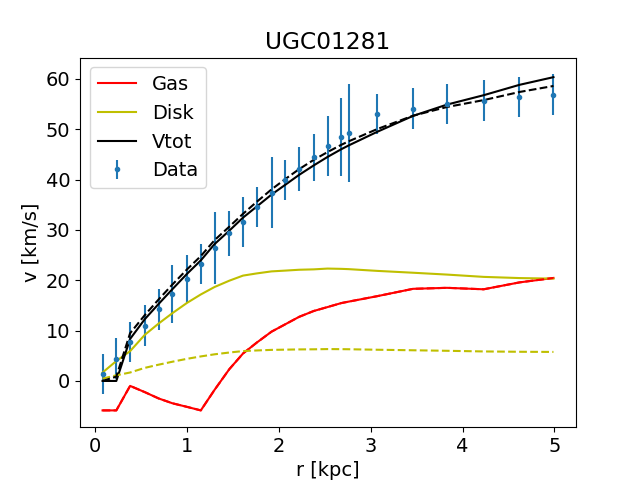

4.396648695507543
3.48305823400669


In [40]:
# observation: Burkert and sol are degenerate

plt.subplots()

name = 'UGC01281';
gal = spc.findGalaxyByName(name, data)
Vtot = np.array([])
plt.errorbar(gal.R, gal.Vobs, gal.dVobs, fmt='.', label='Data')

DM_profile = 'Burkert'
m = 1e-23
M = 10**9.81873454
#M = 1e8
ups_bulg = 1.06925542
ups_disk = 1.24349238
c = 10**-0.16492982
Rs = 14.45240434

chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal, 
                                      flg_Vtot=True, DM_profile=DM_profile)
print(chi2_val)
plt.plot(gal.R, gal.Vgas,'r-', label='Gas')
plt.plot(gal.R, np.sqrt(ups_disk)*gal.Vdisk,'y-', label='Disk')
plt.plot(gal.R, Vtot, 'k-', label='Vtot')





DM_profile = 'Burkert'
m = 1e-23
M = 5.63674629
c = 10**5.44270201 
Rs = 2.76518189
ups_bulg = 0.1
ups_disk = 0.1

chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal, 
                                      flg_Vtot=True, DM_profile=DM_profile)
print(chi2_val)
plt.plot(gal.R, gal.Vgas,'r--')
plt.plot(gal.R, np.sqrt(ups_disk)*gal.Vdisk,'y--')
plt.plot(gal.R, Vtot, 'k--')


plt.legend(loc='best')
plt.xlabel('r [kpc]')
plt.ylabel('v [km/s]')
plt.title('%s' %(gal.name))
plt.savefig('./plots/ugc1281.pdf')

# analyze the chains

The ma slicing result can be checked after the run with the following method:

In [227]:
n_sig = 1.

In [229]:
# sol only
(lst_m_slice_1, 
 lst_M95_upper_1, 
 lst_M95_lower_1, 
 lst_bestfit_1) = margin.m_slicing(runid=16, 
                                   n_sig=n_sig, 
                                   dim_of_param=3, 
                                   verbose=0)

In [241]:
# sol + nfw or sol + Burkert
(lst_m_slice, 
 lst_M95_upper, 
 lst_M95_lower, 
 lst_bestfit) = margin.m_slicing(runid=15, 
                                 n_sig=n_sig, 
                                 dim_of_param=5, 
                                 verbose=0)

-margin.py: logm=-20.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_20/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 95% CL M upper=10^5.66 Msun
-margin.py: 95% CL M lower=10^nan Msun



-margin.py: logm=-19.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_19/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 95% CL M upper=10^5.52 Msun
-margin.py: 95% CL M lower=10^nan Msun



-margin.py: logm=-21.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_21/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'c

if you maginalize only a small set of parameters, e.g. you fix $\Upsilon$ during the run, remember to change the dim_of_param accordingly.

In [231]:
# sol + burkert, fixed Ups
(lst_m_slice_3, 
 lst_M95_upper_3, 
 lst_M95_lower_3, 
 lst_bestfit_3) = margin.m_slicing(runid=18, 
                                   n_sig=n_sig, 
                                   dim_of_param=3, 
                                   verbose=0)

The constraints on $M_{sol}$ can then be plotted out.

<IPython.core.display.Javascript object>


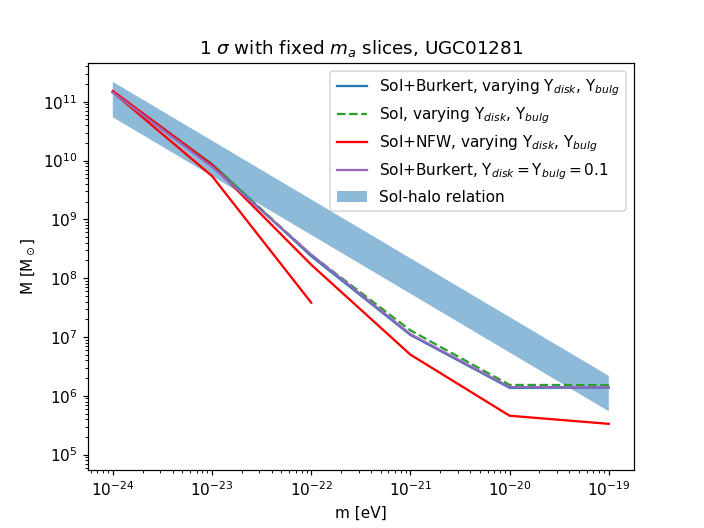

Text(0,0.5,'M [M$_\\odot$]')

In [242]:
lst_m_slice_2, lst_M95_upper_2, lst_M95_lower_2 = zip(*sorted(zip(lst_m_slice_2, lst_M95_upper_2, lst_M95_lower_2)))

lst_m = np.logspace(-24, -19)

plt.subplots()

plt.plot(lst_m_slice, lst_M95_upper, label='Sol+Burkert, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice, lst_M95_lower)

plt.plot(lst_m_slice_1, lst_M95_upper_1, '--', label='Sol, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice_1, lst_M95_lower_1)

plt.plot(lst_m_slice_2, lst_M95_upper_2, 'r-', label='Sol+NFW, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice_2, lst_M95_lower_2, 'r-')

plt.plot(lst_m_slice_3, lst_M95_upper_3, label='Sol+Burkert, $\Upsilon_{disk}=\Upsilon_{bulg}=0.1$')
plt.plot(lst_m_slice_3, lst_M95_lower_3)

#
# comparing with Soliton halo relation
#
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal)), 'k-', label='Sol-halo relation')
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal))*2., 'k--')
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal))/2., 'k--')
plt.fill_between(lst_m, 
                 (margin.SH_bound(lst_m, gal))*2, 
                 (margin.SH_bound(lst_m, gal))/2, 
                 label='Sol-halo relation', 
                 alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.title(r"%d $\sigma$ with fixed $m_a$ slices, %s" %(n_sig, gal.name))
plt.xlabel('m [eV]')
plt.ylabel('M [M$_\odot$]')
#plt.savefig('./output/Mm_%d_%s.pdf' %(n_sig, gal.name))

In [200]:
# check fixing Upsilon

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=18, 
                                                          n_sig=1., 
                                                          dim_of_param=3, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)

print(np.where(min(lst_chi2)==lst_chi2))
print(lst_bf[6])

(array([6]),)
[5.63674629 5.44270201 2.76518189]


<IPython.core.display.Javascript object>


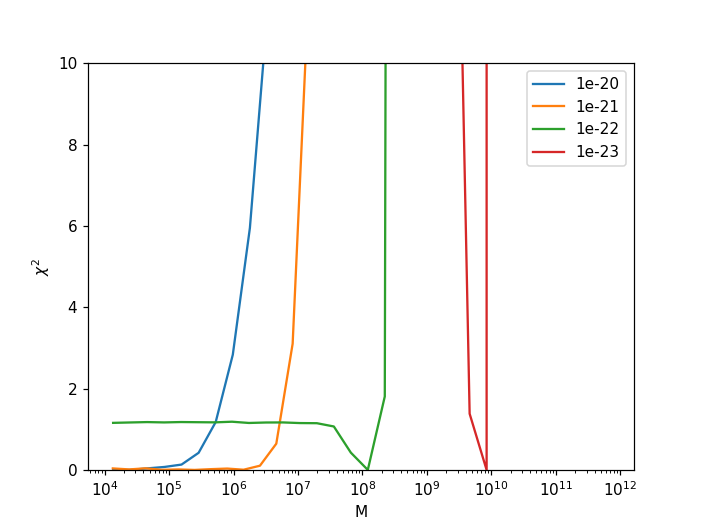

In [243]:
# check the NFW island

plt.subplots()

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-20.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2),  label='1e-20')

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-21.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2),  label='1e-21')


(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-22.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2), label='1e-22')

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2), label='1e-23')

plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, 10)
plt.xlabel('M')
plt.ylabel('$\chi^2$')
plt.legend(loc='best')

In [223]:
(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)

In [226]:
lst_chi2 - min(lst_chi2)

array([2.45487076e+01, 2.47171639e+01, 2.46259648e+01, 2.48241894e+01,
       2.47390538e+01, 2.45888794e+01, 2.45571037e+01, 2.45912507e+01,
       2.46380427e+01, 2.47168064e+01, 2.46447123e+01, 2.45667355e+01,
       2.46991766e+01, 2.46610259e+01, 2.47236906e+01, 2.46014395e+01,
       2.47794758e+01, 2.47853348e+01, 2.47807314e+01, 2.46061445e+01,
       2.18059466e+01, 1.38199100e+00, 0.00000000e+00, 1.29117070e+04,
       2.22517356e+04, 9.73108124e+04, 2.29117139e+05, 5.53370661e+05,
       1.39812221e+06, 5.15781618e+06])

# Normalize to $M_{SH}$

In [182]:
dct_gal = margin.m_slicing(runid='mslicing_1', 
                        n_sig=3,
                        dim_of_param=5, #FIXME
                        multiprocessing=False, 
                        path='../../chains_backup/')

UGC09133
UGC02953
UGC05253
NGC0100
UGC06787
UGC01281
NGC2403
UGC04325


<IPython.core.display.Javascript object>


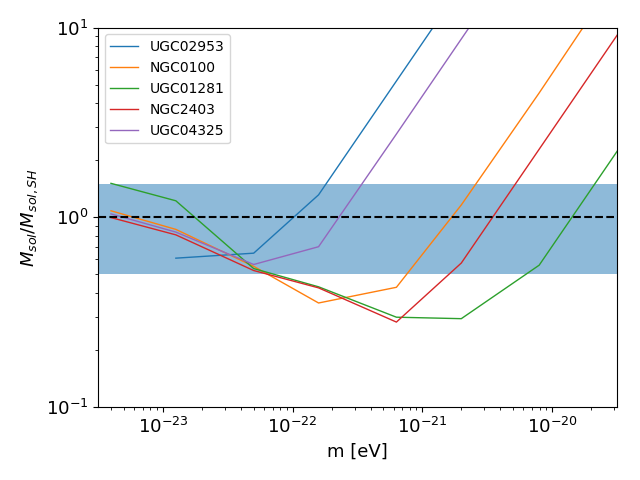

In [189]:
gal_selection = ['NGC2403', 'NGC0100', 'UGC01281', 'UGC04325', 'UGC02953']

plt.subplots()
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams.update({'legend.fontsize': 10})
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1, 10)
plt.xlim(10**(-23.5), 10**(-19.5))

for galname, gal in dct_gal.items():
    if galname not in gal_selection:
        continue
    gal_details = spc.findGalaxyByName(galname, data)
    Msol_SH = model.M_SH(gal.m, gal_details, ctilde=0.35)
    
    xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
    m = [x for x,_ in xy]
    ratio = [y for _,y in xy]
    plt.plot(m, ratio,'-', linewidth=1, label=galname)
    
    
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [0.5] * 50
yup = [1.5] * 50
plt.fill_between(x, ylow, yup, alpha=0.5)
plt.plot(x, y, 'k--')
plt.legend(loc='best')
plt.xlabel('m [eV]')
plt.ylabel('$M_{sol}/M_{sol, SH}$')
plt.tight_layout()
#plt.savefig('sol_solSH_3sigma.pdf')

In [176]:
dct_gal_Bkt = margin.m_slicing(runid='mslicing_Burkert_2', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains_new/')

NGC2403
UGC01281
NGC0100
UGC04325


In [177]:
dct_gal_NFW = margin.m_slicing(runid='mslicing_NFW_1', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains_new/')

NGC2403
UGC09133
NGC0100
UGC04325
UGC01281


<IPython.core.display.Javascript object>


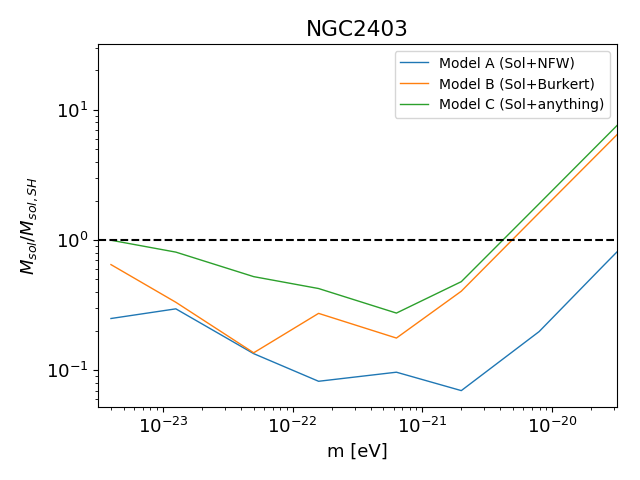

In [181]:
#gal_selection = ['NGC2403', 'NGC0100', 'UGC01281', 'UGC04325', 'UGC02953']


plt.subplots()
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams.update({'legend.fontsize': 10})
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.1, 10)
plt.xlim(10**(-23.5), 10**(-19.5))


galname = 'NGC2403'
#galname = 'UGC01281'
#galname = 'NGC0100'
#galname = 'UGC04325'

gal = dct_gal_NFW[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details, ctilde=0.35)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model A (Sol+NFW)')
    
    
gal = dct_gal_Bkt[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details, ctilde=0.35)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model B (Sol+Burkert)')


gal = dct_gal[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details, ctilde=0.35)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model C (Sol+anything)')


plt.title(galname)

x = np.logspace(-25, -18)
y = [1] * 50
ylow = [0.5] * 50
yup = [1.5] * 50
plt.plot(x, y, 'k--')
plt.legend(loc='best')
plt.xlabel('m [eV]')
plt.ylabel('$M_{sol}/M_{sol, SH}$')
plt.tight_layout()
#plt.savefig('Msol_over_MSH.pdf')

### Sigma counting

This is a simple demonstration of $x \;\sigma$ in $n-d$ is converted to the significance in $1d$.

In [15]:
import statistic as stat

In [17]:
for m in range(0,11):
    print("d=2, %d sigma has chi^2=%.2f" %(m, stat.chi1d_to_chind(chi1d=m, d=2)**2))

d=2, 0 sigma has chi^2=0.00
d=2, 1 sigma has chi^2=2.30
d=2, 2 sigma has chi^2=6.18
d=2, 3 sigma has chi^2=11.83
d=2, 4 sigma has chi^2=19.33
d=2, 5 sigma has chi^2=28.74
d=2, 6 sigma has chi^2=40.09
d=2, 7 sigma has chi^2=53.38
d=2, 8 sigma has chi^2=68.64
d=2, 9 sigma has chi^2=85.87
d=2, 10 sigma has chi^2=105.08


In [18]:
for m in range(0,11):
    print("d=3, %d sigma has chi^2=%.2f" %(m, stat.chi1d_to_chind(chi1d=m, d=3)**2))

d=3, 0 sigma has chi^2=0.00
d=3, 1 sigma has chi^2=3.53
d=3, 2 sigma has chi^2=8.02
d=3, 3 sigma has chi^2=14.16
d=3, 4 sigma has chi^2=22.06
d=3, 5 sigma has chi^2=31.81
d=3, 6 sigma has chi^2=43.45
d=3, 7 sigma has chi^2=57.01
d=3, 8 sigma has chi^2=72.50
d=3, 9 sigma has chi^2=89.94
d=3, 10 sigma has chi^2=109.34


# Sewing NFW with soliton (debug)

<IPython.core.display.Javascript object>


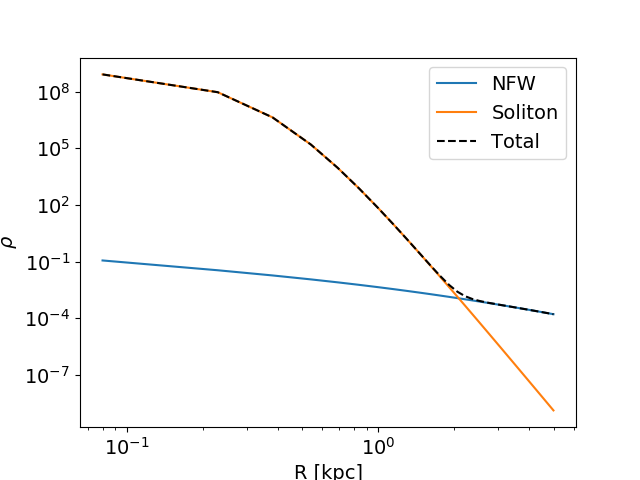

<IPython.core.display.Javascript object>


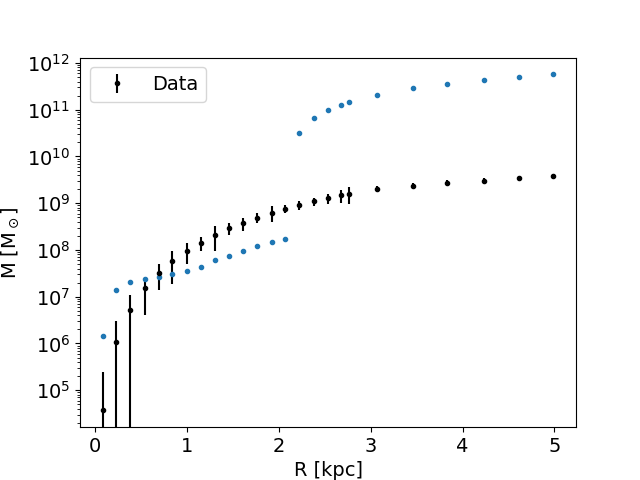

Text(0.5,0,'R [kpc]')

In [90]:
name = 'UGC01281';
c = 200
Rs = 2
ups_bulg = 0.5
ups_disk = 0.5
m = 1e-21 #1e-23
M = 2e7

gal = spc.findGalaxyByName(name, data)
v2_rot, mask = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='NFW',
             m=m,
             M=M,
             flg_debug=True)
M_tot = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_

v2_rot, mask = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='NFW',
             m=None,
             M=None,
             flg_debug=True)
M_NFW = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_

M_obs = gal.Vobs**2 * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_
dM_obs = 2*gal.Vobs*gal.dVobs * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_

# plt.subplots()
# plt.plot(gal.R, np.sqrt(v2_rot))
# plt.errorbar(gal.R, gal.Vobs, gal.dVobs, fmt='k.', label='Data')

rho_NFW_arr = model.rho_NFW(gal.R, Rs=Rs, c=c)
rho_sol_arr = model.rho_sol(gal.R, m=m, M=M)
plt.subplots()
plt.plot(gal.R, rho_NFW_arr*mask, label='NFW')
plt.plot(gal.R, rho_sol_arr, label='Soliton')
plt.plot(gal.R, rho_NFW_arr*mask+rho_sol_arr, 'k--', label='Total')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$\rho$')
plt.xlabel(r'R [kpc]')

plt.subplots()
plt.plot(gal.R, M_tot, '.')
#plt.plot(gal.R, M_NFW, '.')
plt.errorbar(gal.R, M_obs, dM_obs, fmt='k.', label='Data')
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel(r'M [M$_\odot$]')
plt.xlabel(r'R [kpc]')